In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection, ensemble, neighbors, svm, tree, neural_network, base
import matplotlib.pyplot as plt

import importlib
import datetime
import mlTest
import preprocessing
importlib.reload(mlTest)
importlib.reload(preprocessing)

<module 'preprocessing' from 'C:\\Users\\Chunlok Lo\\Documents\\cs4641\\supervised_learning\\implementation\\preprocessing.py'>

In [4]:
df = pd.read_csv("data/sat.tst", header=None, sep=' ')
df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4
5,76,94,102,76,76,89,94,76,76,89,...,75,75,95,100,79,75,91,96,75,4
6,76,89,94,76,76,89,98,76,76,94,...,79,75,91,96,75,75,91,96,71,4
7,76,94,90,76,76,89,94,76,72,94,...,67,75,87,96,71,75,91,96,71,4
8,76,89,94,76,72,94,90,72,72,89,...,71,75,91,96,71,75,87,93,67,4
9,72,89,98,76,76,94,98,76,72,85,...,67,71,79,81,62,71,79,85,62,4


In [10]:
X, y = preprocessing.XySplit(df, 36)
X_train, X_val, X_test, X_train_val, y_train, y_val, y_test, y_train_val = mlTest.train_val_test_split(X, y, train_size=0.8, val_size=0.1)

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
y

0       3
1       3
2       4
3       4
4       4
5       4
6       4
7       4
8       4
9       4
10      4
11      4
12      4
13      4
14      3
15      3
16      3
17      3
18      3
19      3
20      3
21      3
22      3
23      3
24      3
25      3
26      3
27      5
28      7
29      7
       ..
1970    1
1971    1
1972    5
1973    5
1974    5
1975    5
1976    3
1977    3
1978    1
1979    1
1980    1
1981    1
1982    1
1983    1
1984    1
1985    1
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    1
1996    1
1997    5
1998    5
1999    5
Name: 36, Length: 2000, dtype: int64

Initial Performance Testing:

[[37  0  0  0  2  0]
 [ 0 26  0  0  0  1]
 [ 0  0 26  2  0  3]
 [ 0  0  7 10  0  7]
 [ 0  0  0  3 20  2]
 [ 0  0  1  9  2 42]]
0.805


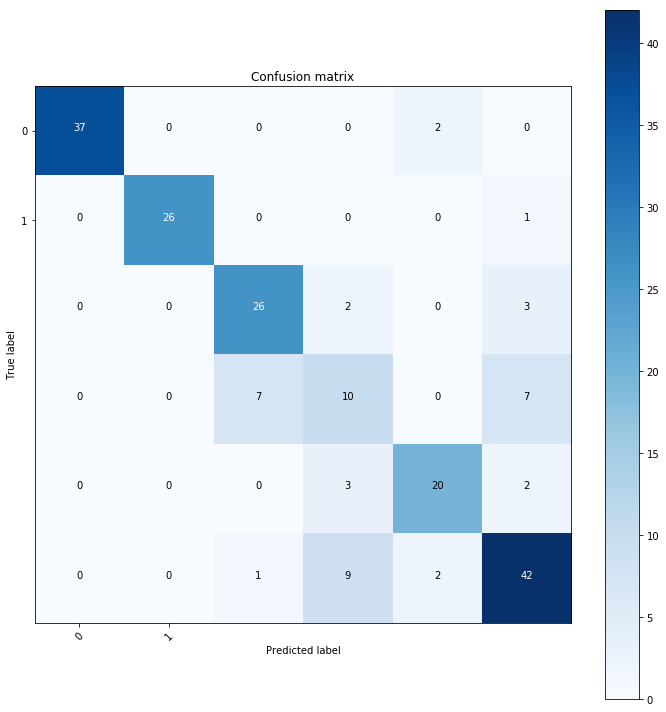

In [12]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_val, y_train_val)
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])
print(accuracy)

[[37  0  0  0  0  2]
 [ 1 26  0  0  0  0]
 [ 4  0 26  0  0  1]
 [ 7  0  8  0  0  9]
 [ 7 11  0  0  4  3]
 [ 6  0  1  0  0 47]]


(array([[37,  0,  0,  0,  0,  2],
        [ 1, 26,  0,  0,  0,  0],
        [ 4,  0, 26,  0,  0,  1],
        [ 7,  0,  8,  0,  0,  9],
        [ 7, 11,  0,  0,  4,  3],
        [ 6,  0,  1,  0,  0, 47]], dtype=int64), 0.7)

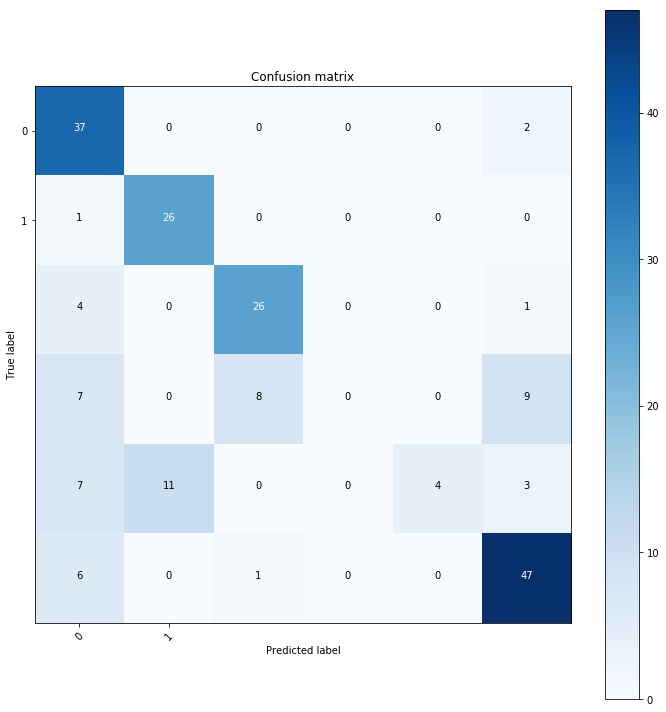

In [13]:
clf = ensemble.AdaBoostClassifier(random_state=0, n_estimators=200)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

[[34  0  0  5  0  0]
 [ 0 24  0  2  1  0]
 [ 0  0  0 31  0  0]
 [ 0  0  0 23  0  1]
 [ 0  0  0 18  6  1]
 [ 0  0  0 39  0 15]]


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(array([[34,  0,  0,  5,  0,  0],
        [ 0, 24,  0,  2,  1,  0],
        [ 0,  0,  0, 31,  0,  0],
        [ 0,  0,  0, 23,  0,  1],
        [ 0,  0,  0, 18,  6,  1],
        [ 0,  0,  0, 39,  0, 15]], dtype=int64), 0.51)

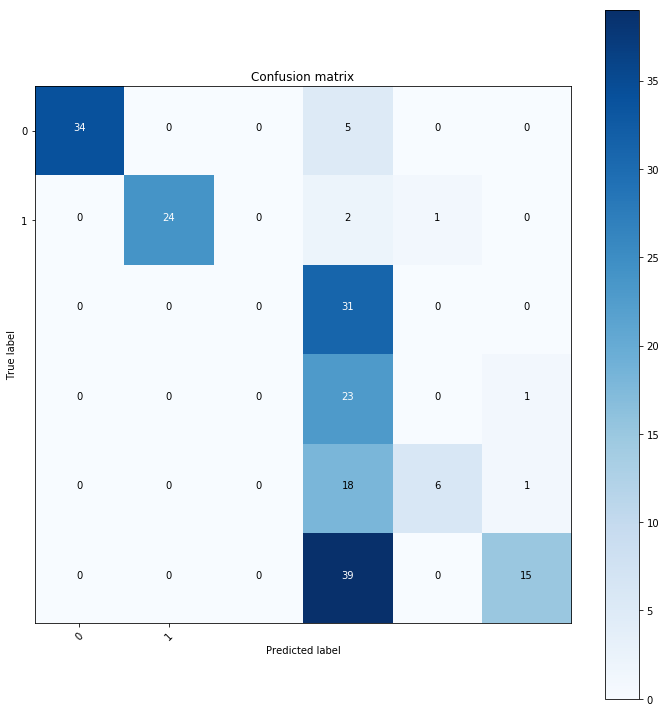

In [27]:
clf = svm.LinearSVC(random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[39  0  0  0  0  0]
 [27  0  0  0  0  0]
 [31  0  0  0  0  0]
 [24  0  0  0  0  0]
 [25  0  0  0  0  0]
 [54  0  0  0  0  0]]


(array([[39,  0,  0,  0,  0,  0],
        [27,  0,  0,  0,  0,  0],
        [31,  0,  0,  0,  0,  0],
        [24,  0,  0,  0,  0,  0],
        [25,  0,  0,  0,  0,  0],
        [54,  0,  0,  0,  0,  0]], dtype=int64), 0.195)

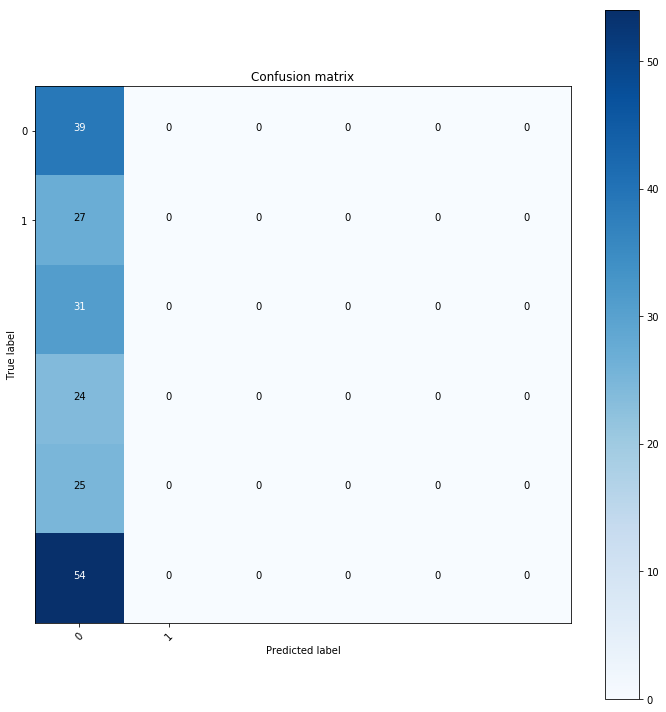

In [26]:
clf = svm.SVC(random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np

model = Sequential()
model.add(Dense(10,input_shape=(36,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(5))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train.values, y_train.values, epochs=200, validation_data=(X_val.values, y_val.values))

Train on 1600 samples, validate on 200 samples
Epoch 1/200
1600/1600 [==============================] - 1s 350us/step - loss: nan - acc: 0.0338 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/200
1600/1600 [==============================] - 0s 135us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/200
1600/1600 [==============================] - 0s 138us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/200
1600/1600 [==============================] - 0s 141us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/200
1600/1600 [==============================] - 0s 136us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/200
1600/1600 [==============================] - 0s 138us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/200
1600/1600 [==============================] - 0s 135us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_

KeyboardInterrupt: 

[[39  0  0  0  0  0]
 [ 0 25  1  0  1  0]
 [ 1  0 28  0  1  1]
 [ 0  0 15  0  0  9]
 [ 5  2  0  0  9  9]
 [ 0  0  4  0  0 50]]


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(array([[39,  0,  0,  0,  0,  0],
        [ 0, 25,  1,  0,  1,  0],
        [ 1,  0, 28,  0,  1,  1],
        [ 0,  0, 15,  0,  0,  9],
        [ 5,  2,  0,  0,  9,  9],
        [ 0,  0,  4,  0,  0, 50]], dtype=int64), 0.755)

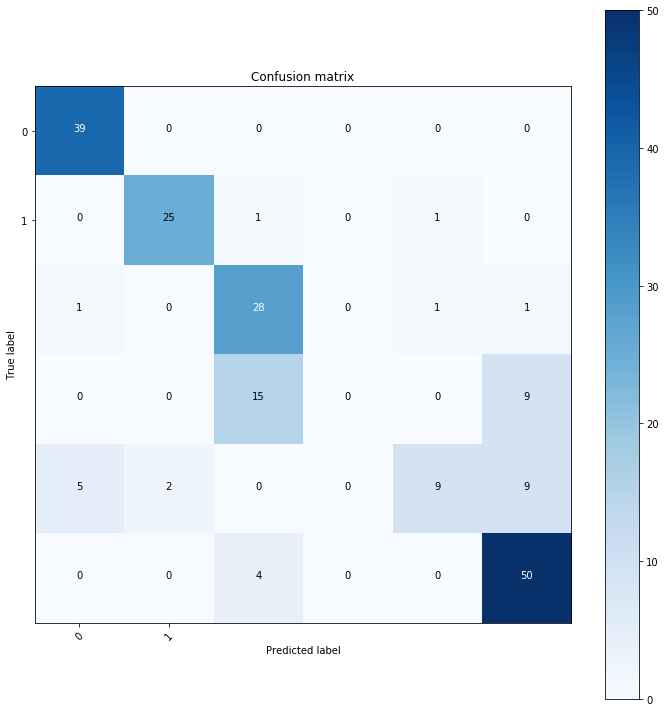

In [25]:
clf = neural_network.MLPClassifier(hidden_layer_sizes=(10, 5), random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

[[39  0  0  0  0  0]
 [ 0 26  0  0  0  1]
 [ 1  1 27  0  0  2]
 [ 0  0  4 18  0  2]
 [ 1  0  0  1 20  3]
 [ 0  0  0  5  0 49]]
0.895


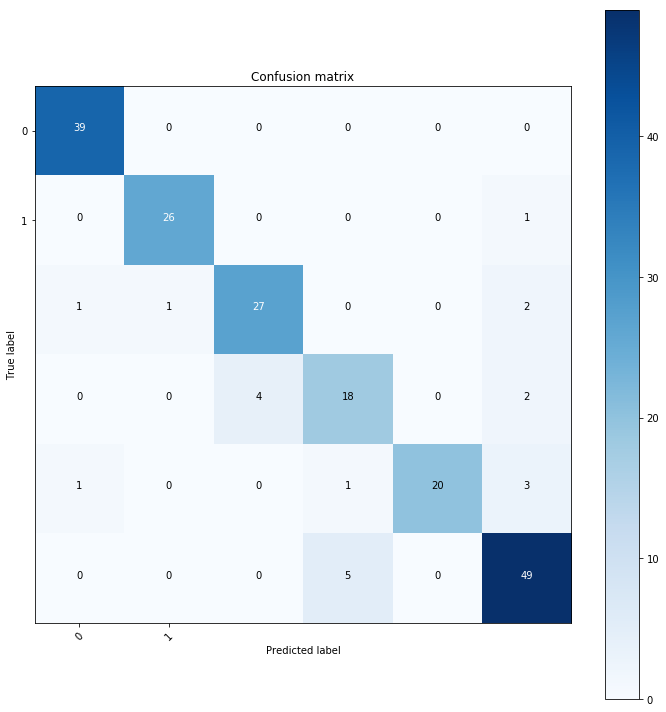

In [28]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train_val, y_train_val)
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])
print(accuracy)

Algorithm Testing:

Decision Tree Classifier:
Testing: Pruning parameter min_impurity_decrease
Testing: Max Depth

0.8488141601621176
0.00022222222222222223


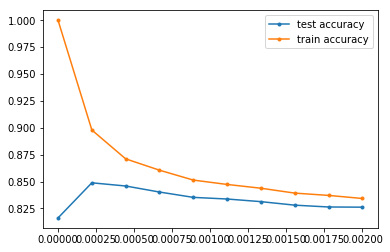

In [62]:
param = ('min_impurity_decrease', np.linspace(0, .002, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
# mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="impurity-train_acc")
# mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="impurity-test_acc")
# mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="impurity-vals")

Processing Param Val: 20.088888888888899
0.8437911029239062
9.444444444444445


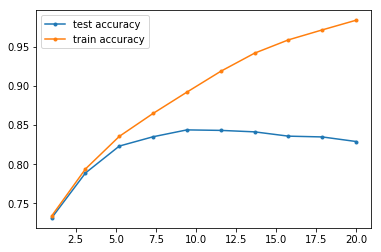

In [64]:
param = ('max_depth', np.linspace(1, 20, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
# mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="max_depth-train_acc")
# mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="max_depth-test_acc")
# mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="max_depth-vals")

Min impurity decrease with max depth did not improve performance. So I just left it out.

Processing Param Val: 0.00277777777777777797
0.8505084267821736
0.0006666666666666668


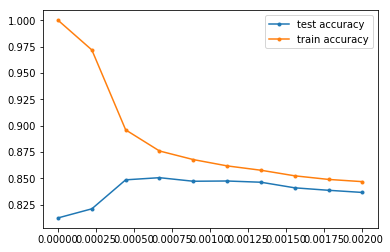

In [66]:
param = ('min_impurity_decrease', np.linspace(0, .002, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0, criterion='entropy')
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
# mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="impurity-train_acc")
# mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="impurity-test_acc")
# mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="impurity-vals")

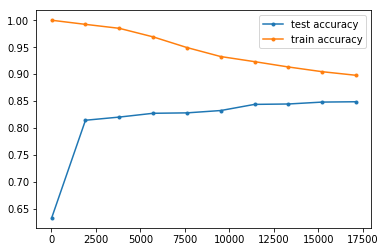

In [75]:
#clf = tree.DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.00022222222222222223)
#train_acc, test_acc, train_samples = mlTest.accuracy_vs_num_train_samples(clf, X_train_val, y_train_val, min_train_num=20)
mlTest.plot_accuracy(train_acc, test_acc, train_samples)

In [76]:
mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="tuned-train_acc")
mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="tuned-test_acc")
mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="tuned-vals")

ADA BOOST TESTING


Testing: n_estimators
learning rate?

Processing Param Val: 150
0.8492232776372785
150


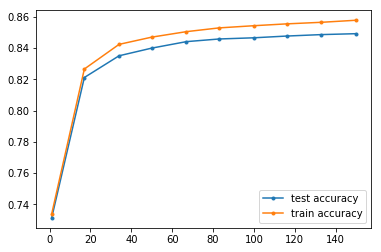

In [95]:
param = ('n_estimators', np.linspace(1, 150, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "MAGIC-ADABoost", descriptors="n_estimators-train_acc")
mlTest.saveNpArray(test_acc, "MAGIC-ADABoost", descriptors="n_estimators-test_acc")
mlTest.saveNpArray(param_vals, "MAGIC-ADABoost", descriptors="n_estimators-vals")

Processing Param Val: 80
0.8492232776372785
150


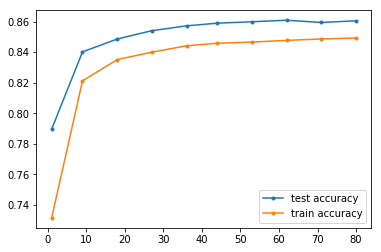

In [96]:
param = ('n_estimators', np.linspace(1, 80, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=2), random_state=0)
train_acc1, test_acc1, param_vals1 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(test_acc, test_acc1, param_vals1)
mlTest.saveNpArray(train_acc1, "MAGIC-decisionTree", descriptors="n_estimators-train_acc-depth2")
mlTest.saveNpArray(test_acc1, "MAGIC-decisionTree", descriptors="n_estimators-test_acc-depth2")
mlTest.saveNpArray(param_vals1, "MAGIC-decisionTree", descriptors="n_estimators-vals-depth2")

0.8685598819076127
53


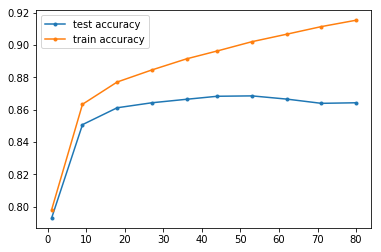

In [19]:
#param = ('n_estimators', np.linspace(1, 80, num=10, dtype=int))
#classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=3), random_state=0)
#train_acc3, test_acc3, param_vals3 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc3))
print(param_vals3[np.argmax(test_acc3)])
mlTest.plot_accuracy(train_acc3, test_acc3, param_vals3)
mlTest.saveNpArray(train_acc3, "MAGIC-adaboost", descriptors="learning_rate-train_acc-depth3")
mlTest.saveNpArray(test_acc3, "MAGIC-adaboost", descriptors="learning_rate-test_acc-depth3")
mlTest.saveNpArray(param_vals3, "MAGIC-adaboost", descriptors="learning_rate-vals-depth3")

0.8623097794916893
18


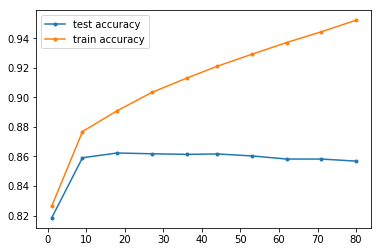

In [21]:
#\param = ('n_estimators', np.linspace(1, 80, num=10, dtype=int))
#classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=4), random_state=0)
#train_acc4, test_acc4, param_vals4 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc4))
print(param_vals3[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc4, test_acc4, param_vals4)
mlTest.saveNpArray(train_acc4, "MAGIC-adaboost", descriptors="learning_rate-train_acc-depth4")
mlTest.saveNpArray(test_acc4, "MAGIC-adaboost", descriptors="learning_rate-test_acc-depth4")
mlTest.saveNpArray(param_vals4, "MAGIC-adaboost", descriptors="learning_rate-vals-depth4")

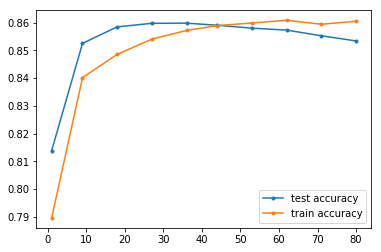

In [94]:
mlTest.plot_accuracy(test_acc1, test_acc3, param_vals3)

In [7]:
param = ('learning_rate', np.linspace(1, 0, num=10))
classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=2), random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(test_acc, test_acc1, param_vals1)
# mlTest.saveNpArray(train_acc1, "MAGIC-adaboost", descriptors="learning_rate-train_acc-depth2")
# mlTest.saveNpArray(test_acc1, "MAGIC-adaboost", descriptors="learning_rate-test_acc-depth2")
# mlTest.saveNpArray(param_vals1, "MAGIC-adaboost", descriptors="learning_rate-vals-depth2")

KeyboardInterrupt: 

In [13]:
acc = np.load("npData/20190206-021010_MAGIC-adaboost_n_estimators-test_acc-depth2.npy")

In [14]:
vals = np.load("npData/20190206-021010_MAGIC-adaboost_n_estimators-vals-depth2.npy")

In [15]:
vals[np.argmax(acc)]

62

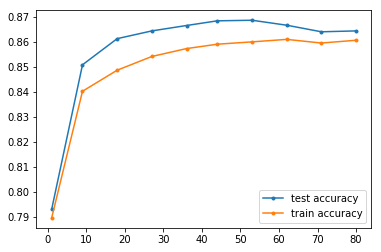

In [16]:
mlTest.plot_accuracy(acc, test_acc3, param_vals3)